In [4]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from gym import Env
from gym.spaces import Discrete
import copy

In [18]:
# Environment
class LHRRL(Env):
    def __init__(self):
        self.myarena = [
            [1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0]
        ]
        self.xpos = 0
        self.ypos = 0 
        self.lastaction = 2
        
    def step(self, action):
        if (action == 0):
            self.ypos -= 1
            self.myarena[self.ypos][self.xpos] = 4
        elif (action == 1):
            self.xpos += 1
            self.myarena[self.ypos][self.xpos] = 4
        elif (action == 2):
            self.ypos += 1
            self.myarena[self.ypos][self.xpos] = 4
        else: 
            self.xpos -= 1
            self.myarena[self.ypos][self.xpos] = 4
            
        self.lastaction = action 
        
        return self.xpos, self.ypos
    
    def render(self):
        pass
    
    def reset(self):
        self.myarena = [
            [1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0]
        ]
        self.xpos = 0
        self.ypos = 0
            
        return self.xpos, self.ypos

In [10]:
# Reinforcement Learning
def rl(arena, xpos, ypos, startx, endx, starty, endy, forbiddenx, forbiddeny):
    # Q table dan parameter
    ylength = len(arena)
    xlength = len(arena[0])
    Qtable = [[0 for i in range(4)] for i in range(4*ylength*xlength)]
    learningrate = 0.25
    discountrate = 0.45
    episode = 1000
    maxstep = 1000
    doit = False
    rpe = []
    spe = []
    
    # Training
    for i in range(episode):
        newypos = ypos
        newxpos = xpos
        reward = 0
        dummyarena = copy.deepcopy(arena)
        state = (dummyarena[newypos][newxpos]-1)*(xlength*ylength) + newxpos + xlength*newypos
        totalstep = 0
        totalreward = 0
        #print(dummyarena)
        
        while (totalstep != maxstep):
            myaction = np.argmax(Qtable[state])

            if (myaction == 0):
                if (newypos-1 == forbiddeny) and (newxpos == forbiddenx):
                    reward -= 20
                    newypos += 1
                else:
                    newypos -= 1
                    if (newypos == -1):
                        reward -= 20
                        newypos +=1
                    else:
                        if (dummyarena[newypos][newxpos] == 0):
                            dummyarena[newypos][newxpos] = 1
                            reward += 3
                        elif (dummyarena[newypos][newxpos] < 4):
                            reward += 3 - 20*dummyarena[newypos][newxpos]
                            dummyarena[newypos][newxpos] += 1
                        elif (dummyarena[newypos][newxpos] == 4):
                            reward -= 77
                        else:
                            reward -= 20
                            newypos += 1
                        
            elif (myaction == 1):
                if (newypos == forbiddeny) and (newxpos+1 == forbiddenx):
                    reward -= 20
                    newypos += 1
                else:
                    newxpos += 1
                    if (newxpos == xlength):
                        reward -= 20
                        newxpos -=1
                    else:
                        if (dummyarena[newypos][newxpos] == 0):
                            dummyarena[newypos][newxpos] = 1
                            reward += 3
                        elif (dummyarena[newypos][newxpos] < 4):
                            reward += 3 - 20*dummyarena[newypos][newxpos]
                            dummyarena[newypos][newxpos] += 1
                        elif (dummyarena[newypos][newxpos] == 4):
                            reward -= 77
                        else:
                            reward -= 20
                            newxpos -= 1
                        
            elif (myaction == 2):
                if (newypos+1 == forbiddeny) and (newxpos == forbiddenx):
                    reward -= 20
                    newypos += 1
                else:
                    newypos += 1
                    if (newypos == ylength): 
                        reward -= 20
                        newypos -=1
                    else:
                        if (dummyarena[newypos][newxpos] == 0): 
                            dummyarena[newypos][newxpos] = 1
                            reward += 3
                        elif (dummyarena[newypos][newxpos] < 4): 
                            reward += 3 - 20*dummyarena[newypos][newxpos]
                            dummyarena[newypos][newxpos] += 1
                        elif (dummyarena[newypos][newxpos] == 4):
                            reward -= 77
                        else:
                            reward -= 20
                            newypos -= 1
                        
            else:
                if (newypos == forbiddeny) and (newxpos-1 == forbiddenx):
                    reward -= 20
                    newypos += 1
                else: 
                    newxpos -= 1
                    if (newxpos == -1): 
                        reward -= 20
                        newxpos += 1
                    else:
                        if (dummyarena[newypos][newxpos] == 0): 
                            dummyarena[newypos][newxpos] = 1
                            reward += 3
                        elif (dummyarena[newypos][newxpos] < 4):
                            reward += 3 - 20*dummyarena[newypos][newxpos]
                            dummyarena[newypos][newxpos] += 1
                        elif (dummyarena[newypos][newxpos] == 4):
                            reward -= 77
                        else:
                            reward -= 20
                            newxpos += 1
            #print(arena)
            #print(dummyarena)
            newstate = (dummyarena[newypos][newxpos]-1)*(xlength*ylength) + newxpos + xlength*newypos
            
            if (not (any(0 in row[startx:endx+1] for row in dummyarena[starty:endy+1]))):
                #print("recorded")
                reward += 2000
                
            oldvalue = Qtable[state][myaction]
            nextvalue = max(Qtable[newstate])
            newvalue = (1-learningrate)*oldvalue + learningrate*(reward + discountrate*nextvalue)
            Qtable[state][myaction] = newvalue
            state = newstate
            totalreward += reward
            reward = 0
            totalstep += 1
            
            if (not (any(0 in row[startx:endx+1] for row in dummyarena[starty:endy+1]))):
                #print("done")
                break
        #print(dummyarena)
        spe.append(totalstep)
        rpe.append(totalreward)
    
    plt.title("Cumulative reward per episode")
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    plt.plot(rpe)
    plt.show()
    plt.title("# Steps per episode")
    plt.xlabel("Episode")
    plt.ylabel("# Steps")
    plt.plot(spe)
    plt.show()
    
    #print(Qtable)
            
    changexpos = xpos
    changeypos = ypos
    outputmovement = []
    movingarena = arena
    #debug = 0
    while (not doit):
        statenow = (movingarena[changeypos][changexpos]-1)*(xlength*ylength) + changexpos + xlength*changeypos
        goaction = np.argmax(Qtable[statenow])
        if (goaction == 0):
            changeypos -= 1
            #print(changeypos)
            if (movingarena[changeypos][changexpos] < 4):
                movingarena[changeypos][changexpos] += 1
        elif (goaction == 1):
            changexpos += 1
            #print(changexpos)
            if (movingarena[changeypos][changexpos] < 4):
                movingarena[changeypos][changexpos] += 1
        elif (goaction == 2):
            changeypos += 1
            #print(changeypos)
            if (movingarena[changeypos][changexpos] < 4):
                movingarena[changeypos][changexpos] += 1
        elif (goaction == 3):
            changexpos -= 1
            #print(changexpos)
            if (movingarena[changeypos][changexpos] < 4):
                movingarena[changeypos][changexpos] += 1
        outputmovement.append(goaction)
        print(changexpos, changeypos)
        debug += 1
        if (debug == 70):
            print(movingarena)
            doit = True
        if (not (any(0 in row[startx:endx+1] for row in movingarena[starty:endy+1]))):
            doit = True
    return(outputmovement)

In [8]:
# Backtracking
def backtrack(agentxpos, agentypos, destxpos, destypos):
    movement = []
    movingxpos = agentxpos
    movingypos = agentypos
    while (movingxpos != destxpos) or (movingypos != destypos):
        if (movingxpos > destxpos):
            movement.append(3)
            movingxpos -= 1
        elif (movingxpos < destxpos):
            movement.append(1)
            movingxpos += 1
        elif (movingypos > destypos):
            movement.append(0)
            movingypos -= 1
        else:
            movement.append(2)
            movingypos += 1
    return movement

In [25]:
# Left Hand Rule
def lhr(lastmove, arena, xpos, ypos):
    if (lastmove == 0): #atas
        if (xpos-1 != -1): #kiri
            if (arena[ypos][xpos-1] == 0 or arena[ypos][xpos-1] == 1):
                return 3
        if (ypos-1 != -1): #atas
            if (arena[ypos-1][xpos] == 0 or arena[ypos-1][xpos] == 1):
                return 0
        if (xpos+1 != len(arena[0])): #kanan
            if (arena[ypos][xpos+1] == 0 or arena[ypos][xpos+1] == 1):
                return 1
        if (ypos+1 != len(arena)): #bawah
            if (arena[ypos+1][xpos] == 0 or arena[ypos+1][xpos] == 1):
                return 2
        return 5
    elif (lastmove == 1): #kanan
        if (ypos-1 != -1): #atas
            if (arena[ypos-1][xpos] == 0 or arena[ypos-1][xpos] == 1):
                return 0
        if (xpos+1 != len(arena[0])): #kanan
            if (arena[ypos][xpos+1] == 0 or arena[ypos][xpos+1] == 1):
                return 1
        if (ypos+1 != len(arena)): #bawah
            if (arena[ypos+1][xpos] == 0 or arena[ypos+1][xpos] == 1):
                return 2
        if (xpos-1 != -1): #kiri
            if (arena[ypos][xpos-1] == 0 or arena[ypos][xpos-1] == 1):
                return 3
        return 5
    elif (lastmove == 2): #bawah
        if (xpos+1 != len(arena[0])): #kanan
            if (arena[ypos][xpos+1] == 0 or arena[ypos][xpos+1] == 1):
                return 1
        if (ypos+1 != len(arena)): #bawah
            if (arena[ypos+1][xpos] == 0 or arena[ypos+1][xpos] == 1):
                return 2
        if (xpos-1 != -1): #kiri
            if (arena[ypos][xpos-1] == 0 or arena[ypos][xpos-1] == 1):
                return 3
        if (ypos-1 != -1): #atas
            if (arena[ypos-1][xpos] == 0 or arena[ypos-1][xpos] == 1):
                return 0
        return 5
    else: #kiri
        if (ypos+1 != len(arena)): #bawah
            if (arena[ypos+1][xpos] == 0 or arena[ypos+1][xpos] == 1):
                return 2
        if (xpos-1 != -1): #kiri
            if (arena[ypos][xpos-1] == 0 or arena[ypos][xpos-1] == 1):
                return 3
        if (ypos-1 != -1): #atas
            if (arena[ypos-1][xpos] == 0 or arena[ypos-1][xpos] == 1):
                return 0
        if (xpos+1 != len(arena[0])): #kanan
            if (arena[ypos][xpos+1] == 0 or arena[ypos][xpos+1] == 1):
                return 1
        return 5

In [19]:
myenv = LHRRL()

In [37]:
nextaction = lhr(myenv.lastaction, myenv.myarena, myenv.xpos, myenv.ypos)
myenv.step(nextaction)
print(myenv.lastaction)
myenv.myarena

0


[[4, 4, 4, 4, 4],
 [4, 0, 0, 0, 4],
 [4, 0, 0, 0, 4],
 [4, 0, 0, 0, 4],
 [4, 4, 4, 4, 4]]

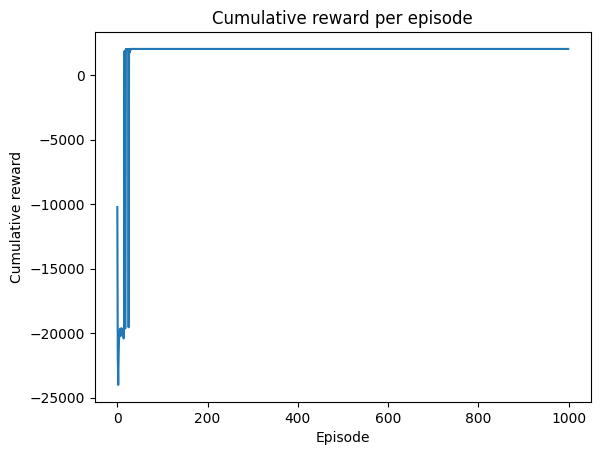

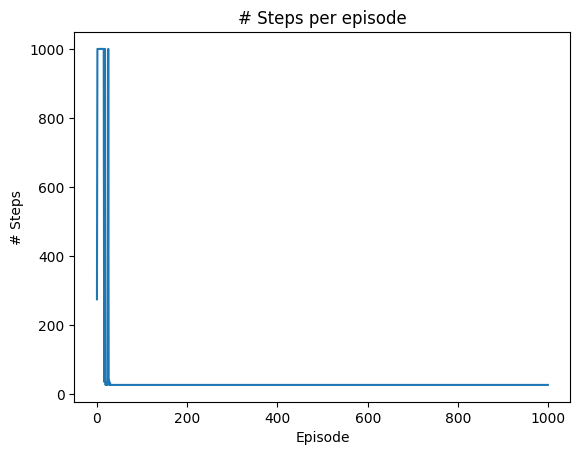

1 0
2 0
3 0
4 0
4 1
4 2
4 3
4 4
3 4
2 4
1 4
0 4
0 3
1 3
2 3
2 2
1 2
0 2
0 3
1 3
2 3
3 3
3 2
3 1
2 1
1 1
0 1


[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 0,
 1,
 1,
 0,
 3,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 3,
 3,
 3]

In [11]:
anu = [
            [1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0]
        ]
#not (any(0 in row[0:len(anu[0])+1] for row in anu[0:len(anu)+1]))
rl(anu, 0, 0, 0, len(anu[0]), 0, len(anu), 0, 0)

In [1]:
a = 2
b = 3
print(a, b)

2 3
